In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# Define the model architecture with Input layer
from tensorflow.keras.layers import Input

In [61]:
import pandas as pd
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [62]:
data_dir = 'ds'
train_path = 'ds/Train'
test_path = 'ds/'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [63]:
#finding total number of classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [7]:
# Label Overvie (labelling each class)
classes = { 0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)', 3:'Speed limit (60km/h)', 4:'Speed limit (70km/h)', 5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 7:'Speed limit (100km/h)', 8:'Speed limit (120km/h)', 9:'No passing', 10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 12:'Priority road', 13:'Yield', 14:'Stop', 15:'No vehicles', 16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 18:'General caution', 19:'Dangerous curve left', 20:'Dangerous curve right', 21:'Double curve', 22:'Bumpy road',  23:'Slippery road', 
            24:'Road narrows on the right', 25:'Road work',  26:'Traffic signals',  27:'Pedestrians', 28:'Children crossing', 29:'Bicycles crossing', 
            30:'Beware of ice/snow',31:'Wild animals crossing', 32:'End speed + passing limits', 33:'Turn right ahead', 34:'Turn left ahead', 
            35:'Ahead only', 36:'Go straight or right', 37:'Go straight or left',  38:'Keep right', 39:'Keep left', 40:'Roundabout mandatory', 
            41:'End of no passing', 42:'End no passing veh > 3.5 tons' }

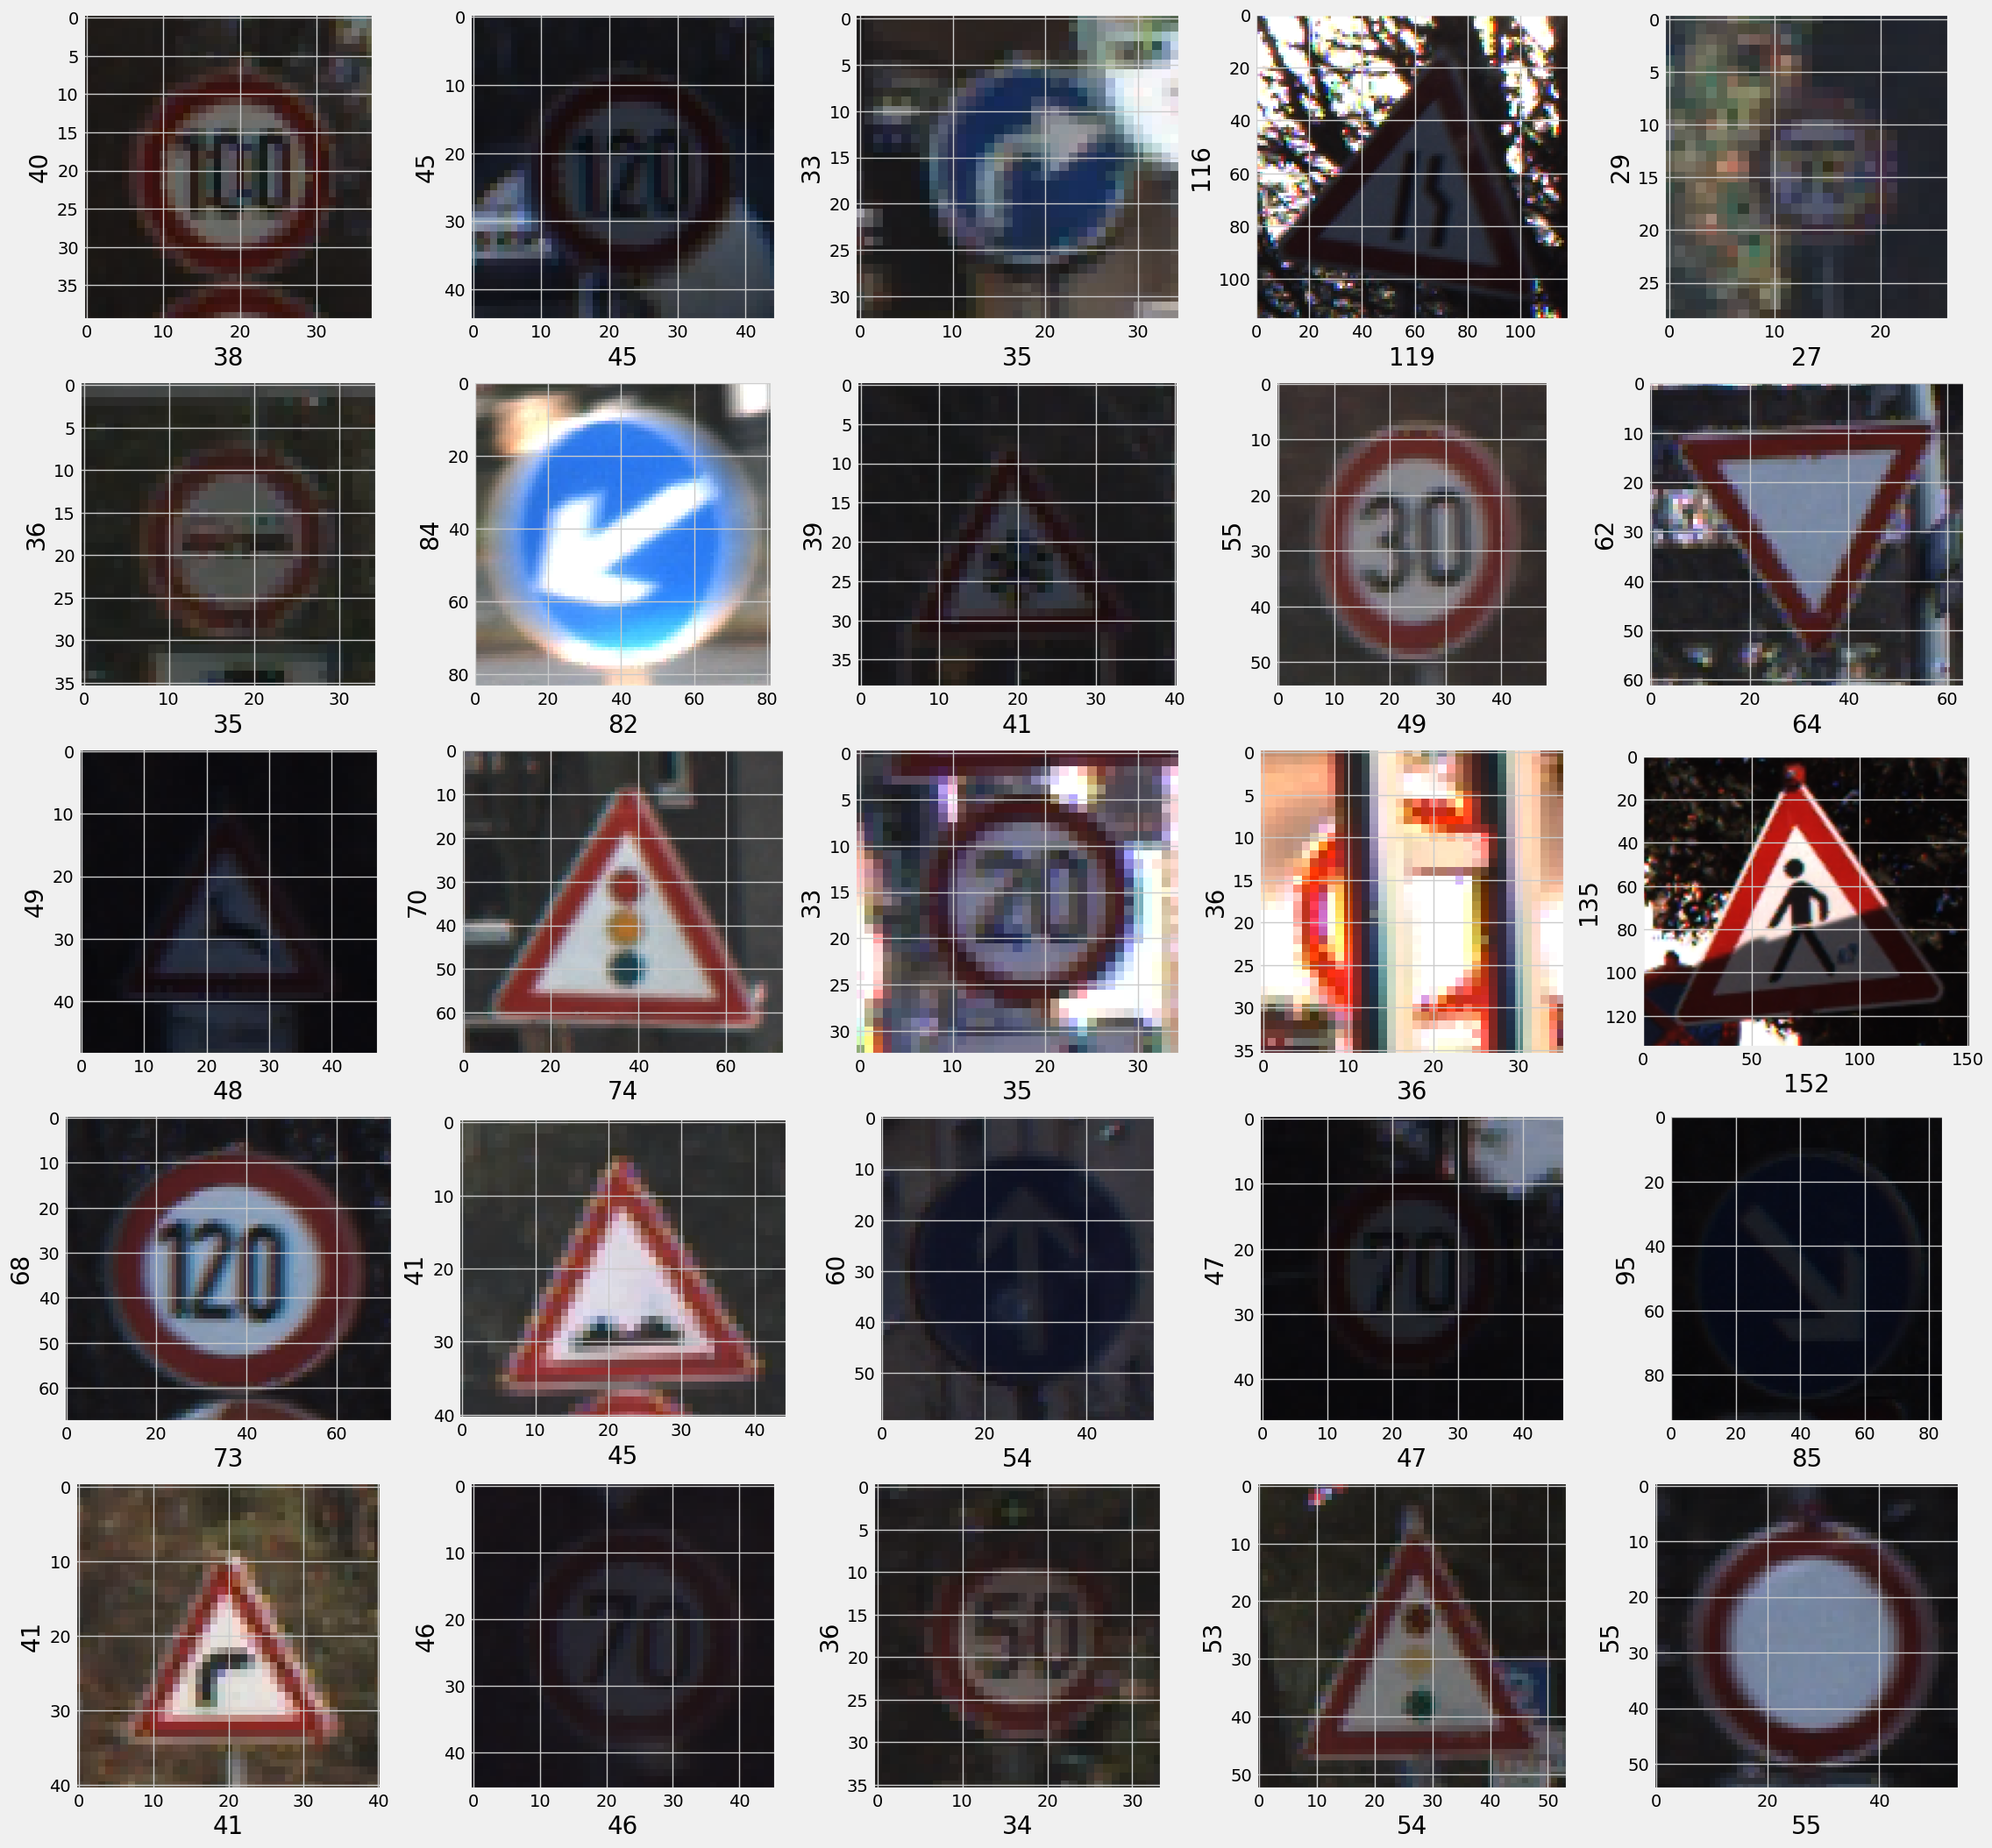

In [60]:
# Visualizing 25 random images from the test data
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [34]:
import os
import cv2
import numpy as np
from PIL import Image

# Parameters
IMG_HEIGHT = 64
IMG_WIDTH = 64
NUM_CATEGORIES = 43  

# Initialize lists to store image data and labels
image_data = []
image_labels = []

# Base directory for the dataset
data_dir = 'ds'  

# Loop over all categories
for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, 'Train', str(i))
    if not os.path.exists(path):
        print(f"Directory does not exist: {path}")
        continue

    # List all files in the category directory
    images = os.listdir(path)

    # Process each image
    for img in images:
        try:
            image_path = os.path.join(path, img)
            # Open the image using PIL and convert to RGB
            image = Image.open(image_path).convert('RGB')
            # Resize the image
            resized_image = image.resize((IMG_HEIGHT, IMG_WIDTH))
            # Convert the image to a numpy array
            image_array = np.array(resized_image)
            # Append the image data and label to lists
            image_data.append(image_array)
            image_labels.append(i)
        except Exception as e:
            print(f"Error processing {img}: {e}")

# Convert lists to numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(f"Loaded {len(image_data)} images.")

# Verify the shape of the image data and labels
print(f"Image data shape: {image_data.shape}")
print(f"Image labels shape: {image_labels.shape}")


Loaded 39209 images.
Image data shape: (39209, 64, 64, 3)
Image labels shape: (39209,)


In [35]:
#helps the model by preventing the learning order bias
# this method is called shuffling 

shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [36]:
#making sure the images are actually loaded
print(f"Number of images loaded: {len(image_data)}")

Number of images loaded: 39209


In [37]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42)

#normalizing the data 
X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 64, 64, 3)
X_valid.shape (11763, 64, 64, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [39]:
#this is one hot encoder 
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [56]:
#the model containing the layers 
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [58]:
#learning rate 
lr = 0.001
epochs = 5

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [59]:
#Data augumentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/5
858/858 [==============================] - 467s 541ms/step - loss: 1.4028 - accuracy: 0.6263 - val_loss: 0.1819 - val_accuracy: 0.9459
Epoch 2/5
858/858 [==============================] - 475s 554ms/step - loss: 0.2516 - accuracy: 0.9242 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 3/5
858/858 [==============================] - 444s 517ms/step - loss: 0.1265 - accuracy: 0.9636 - val_loss: 0.0487 - val_accuracy: 0.9863
Epoch 4/5
858/858 [==============================] - 384s 447ms/step - loss: 0.0908 - accuracy: 0.9738 - val_loss: 0.0132 - val_accuracy: 0.9967
Epoch 5/5
858/858 [==============================] - 315s 367ms/step - loss: 0.0664 - accuracy: 0.9807 - val_loss: 0.0114 - val_accuracy: 0.9969


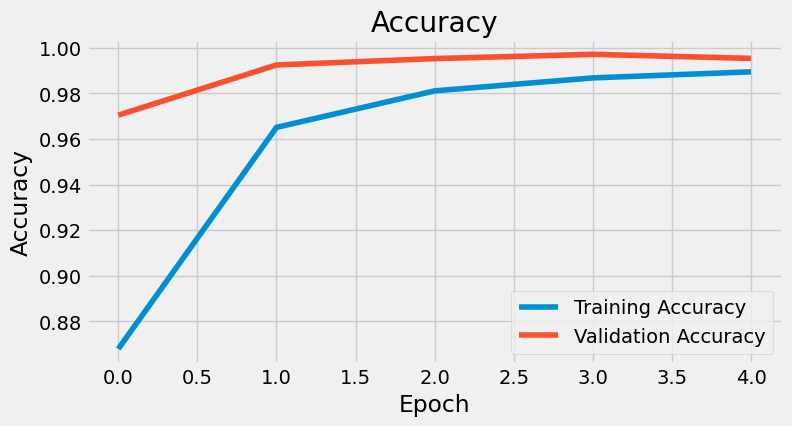

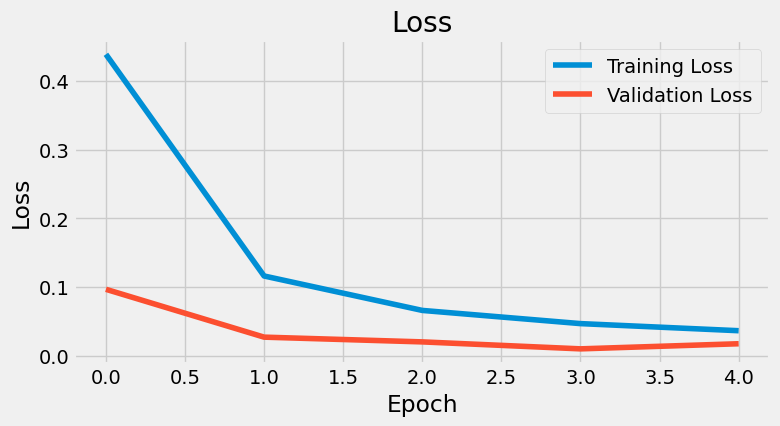

In [49]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from keras.models import load_model  # Adjust import based on your model library
from sklearn.metrics import accuracy_score

# Load test data
test = pd.read_csv(data_dir + '/Test.csv')

# Extract labels and image paths
labels = test["ClassId"].values
imgs = test["Path"].values

# Initialize a list to hold preprocessed images
data = []

# Process each image in the test set
for img in imgs:
    try:
        # Construct the full path to the image
        image_path = data_dir + '/' + img
        
        # Load the image using OpenCV
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue
        
        # Convert image from BGR (OpenCV default) to RGB (Pillow format)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Convert to PIL Image and resize
        image_pil = Image.fromarray(image_rgb)
        resize_image = image_pil.resize((IMG_HEIGHT, IMG_WIDTH))
        
        # Append to the list
        data.append(np.array(resize_image))
    except Exception as e:
        print(f"Error processing image {img}: {e}")

# Convert list to numpy array
X_test = np.array(data)

# Normalize image data
X_test = X_test / 255.0

# Make predictions
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)  # Get the class with the highest probability

# Compute accuracy
accuracy = accuracy_score(labels, pred) * 100
print(f'Test Data Accuracy: {accuracy:.2f}%')


395/395 [==============================] - 43s 103ms/step
Test Data Accuracy: 96.72%


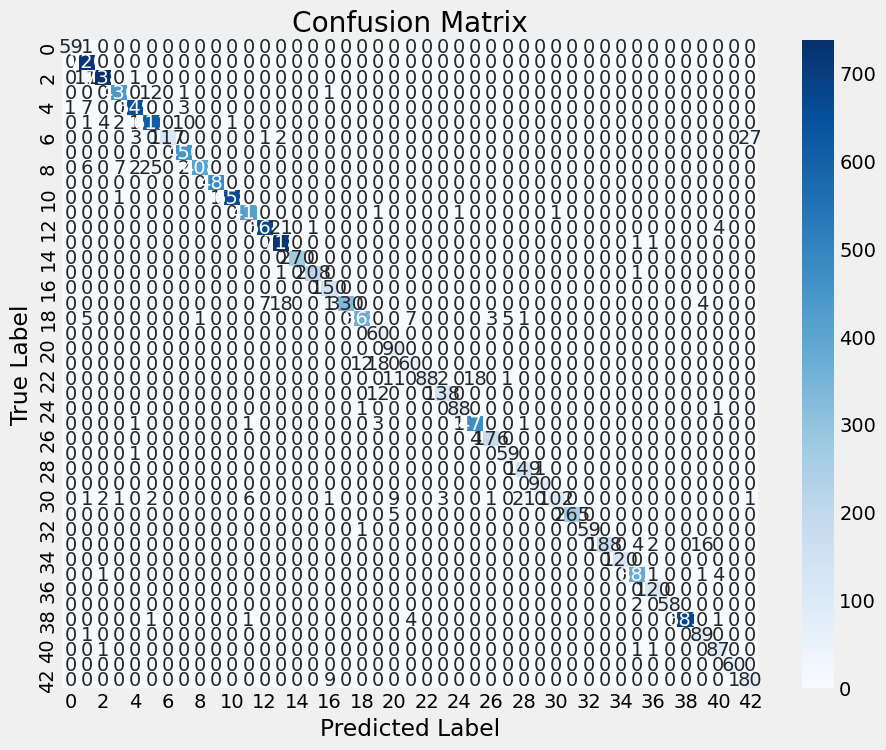

In [55]:
# Confusion Matrix
conf_matrix = confusion_matrix(labels, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 106ms/step
Predicted class: 14


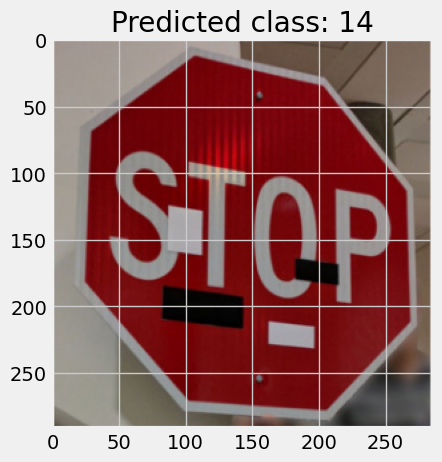

In [68]:
#testing the model 
test_image_path = 'test.png'  # Replace with the path to the image you want to test

# Load and preprocess the test image
def preprocess_image(img_path):
    # Load image using PIL
    img = Image.open(img_path).convert('RGB')
    # Resize and normalize the image
    img = img.resize((64, 64))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Preprocess the image
img_array = preprocess_image(test_image_path)

# Make prediction
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)

# Display the result
print(f'Predicted class: {predicted_class[0]}')

# Optionally, display the image
img = Image.open(test_image_path)
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class[0]}')
plt.show()
